In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets
... Redefining capture for ipywidgets < 7


## A basic introduction to filtering

Through examples, we define several operations on signals and show how they transform them. Then we define what is a filter and the notion of impulse response.   

- [Transformations of signals - Examples of difference equations](#difference_equations)
- [Filters](#filters)
- [Notion of impulse response](#impulse_response)

### Transformations of signals - Examples of difference equations <a name="difference_equations"></a>

We begin by defining a test signal.

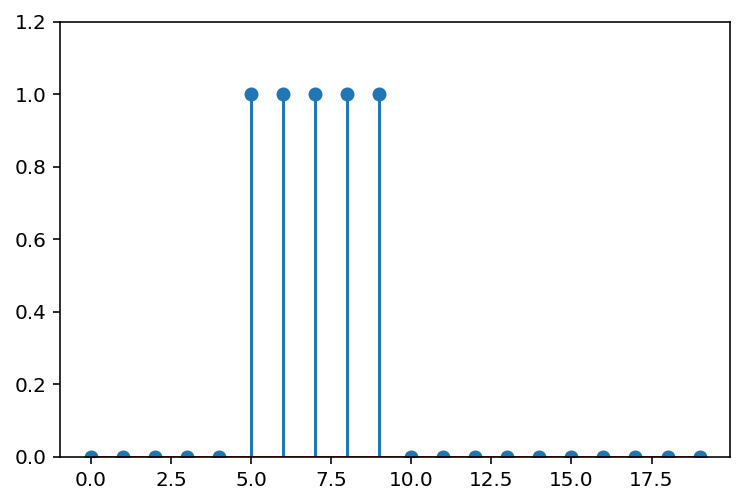

In [2]:
# rectangular pulse
N=20; L=5; M=10
r=np.zeros(N)

r[L:M]=1
#
plt.stem(r)
_=plt.ylim([0, 1.2])

In [3]:
def op1(signal):
    transformed_signal=np.zeros(np.size(signal))
    for t in np.arange(np.size(signal)):
        transformed_signal[t]=signal[t]-signal[t-1]
    return transformed_signal    

def op2(signal):
    transformed_signal=np.zeros(np.size(signal))
    for t in np.arange(np.size(signal)):
        transformed_signal[t]=0.5*signal[t]+0.5*signal[t-1]
    return transformed_signal

Text(0.5,1,'Filtering of rectangular signal with op2')

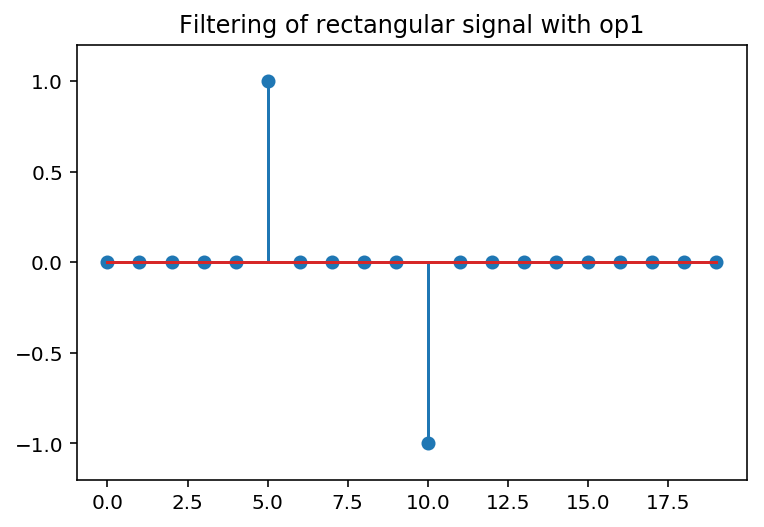

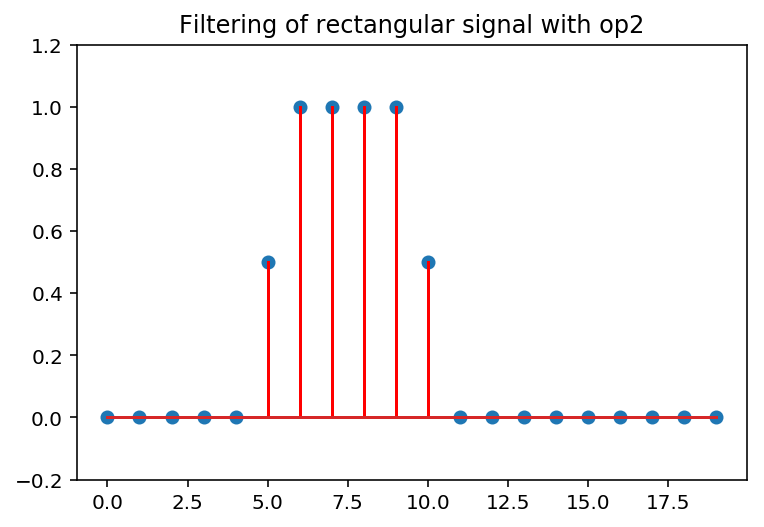

In [12]:
plt.figure()
plt.stem(op1(r))
_=plt.ylim([-1.2, 1.2])
plt.title("Filtering of rectangular signal with op1")
plt.figure()
plt.stem(op2(r),'r')
_=plt.ylim([-0.2, 1.2])
plt.title("Filtering of rectangular signal with op2")

We define a sine wave and check that the operation implemented by "op1" seems to be a derivative...

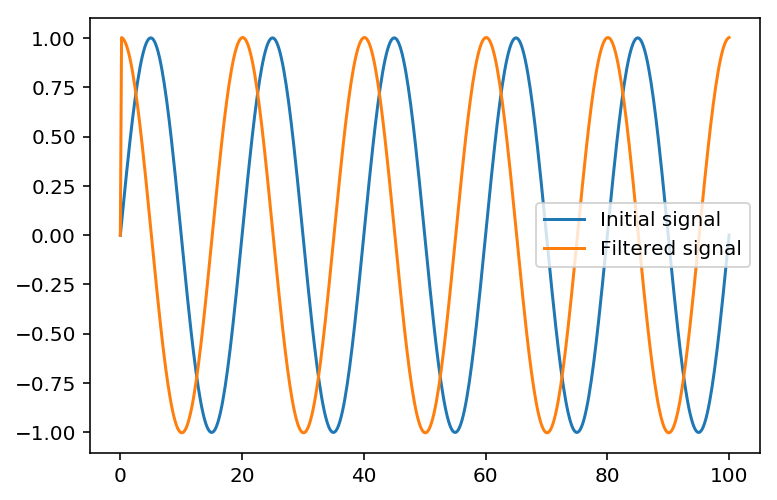

In [5]:
t=np.linspace(0,100,500)
sig=np.sin(2*pi*0.05*t)
plt.plot(t,sig, label="Initial signal")
plt.plot(t,5/(2*pi*0.05)*op1(sig), label="Filtered signal")
plt.legend()

Composition of operations:

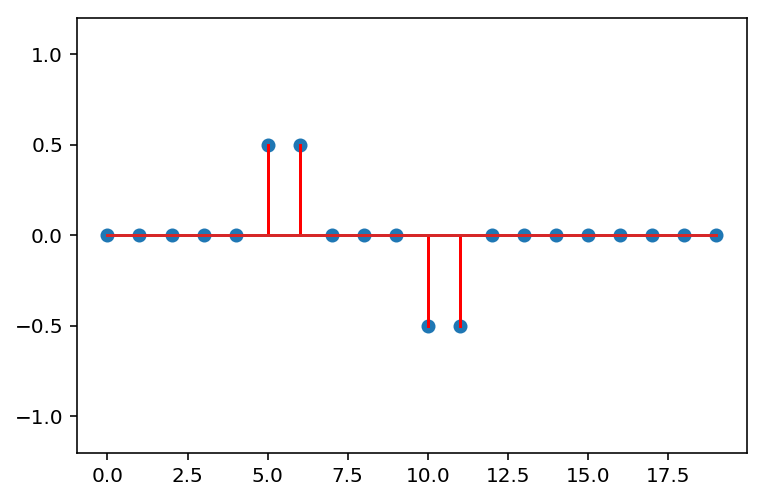

In [13]:
plt.stem(op1(op2(r)),'r')
_=plt.ylim([-1.2, 1.2])

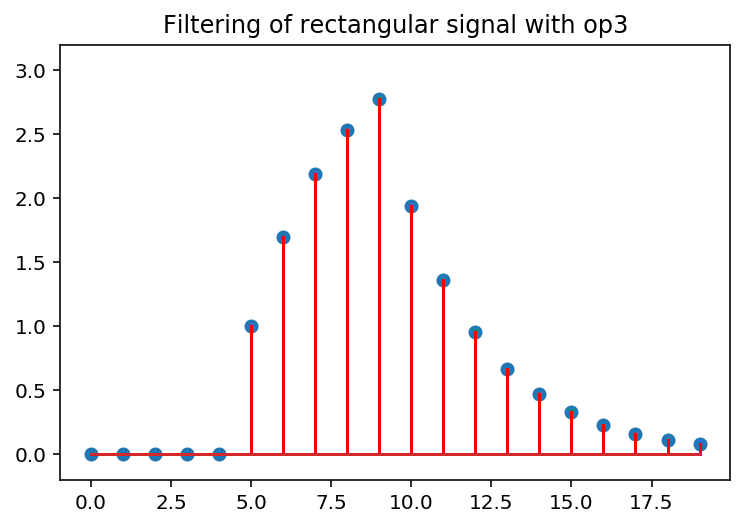

In [7]:
def op3(signal):
    transformed_signal=np.zeros(np.size(signal))
    for t in np.arange(np.size(signal)):
        transformed_signal[t]= 0.7*transformed_signal[t-1]+signal[t]
    return transformed_signal

plt.stem(op3(r),'r')
plt.title("Filtering of rectangular signal with op3")
_=plt.ylim([-0.2, 3.2])

#### A curiosity

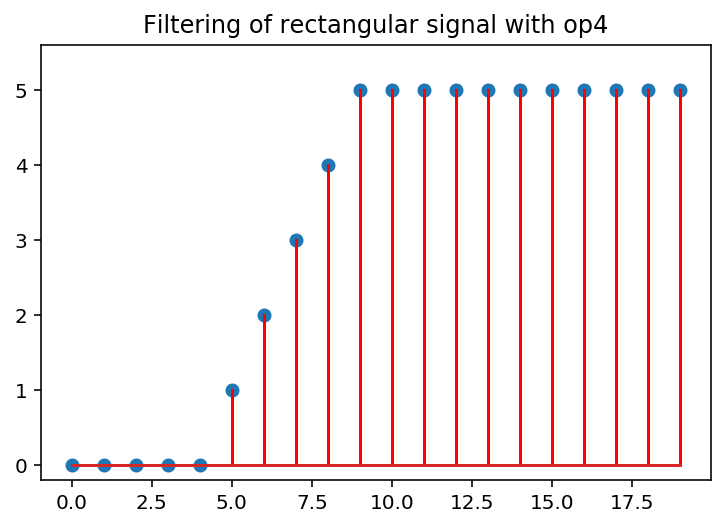

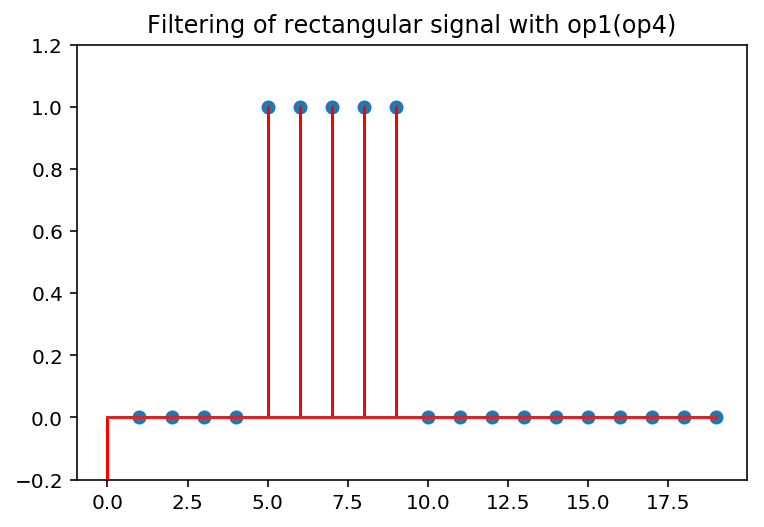

In [15]:
def op4(signal):
    transformed_signal=np.zeros(np.size(signal))
    for t in np.arange(np.size(signal)):
        transformed_signal[t]= 1*transformed_signal[t-1]+signal[t]
    return transformed_signal

plt.stem(op4(r),'r')
plt.title("Filtering of rectangular signal with op4")
_=plt.ylim([-0.2, 5.6])
# And then..
plt.figure()
plt.stem(op1(op4(r)),'r')
plt.title("Filtering of rectangular signal with op1(op4)")
_=plt.ylim([-0.2, 1.2])

### Filters <a name="filters"></a>

**Definition** A filter is a time-invariant linear system. 

- Time invariance means that if $y(n)$ is the response associated with an input $x(n)$, then $y(n-n_0)$ is the response associated with the input $x(n-n_0)$. 
- Linearity means that if $y_1(n)$ and $y_2(n)$ are the outputs associated with $x_1(n)$ and $x_2(n)$, then the output associated with $a_1x_1(n)+a_2x_2(n)$ is $a_1y_1(n)+a_2y_2(n)$ (superposition principle)

\begin{exercise} 
Check whether the following systems are filters or not. 

- $x(n) \rightarrow 2x(n)$
- $x(n) \rightarrow 2x(n) + 1$
- $x(n) \rightarrow 2x(n)+x(n-1)$
- $x(n) \rightarrow x(n)^2$

\end{exercise}

#### Notion of impulse response <a name="impulse_response"></a>

\begin{definition}\label{def:def0}
A Dirac impulse (or impulse for short) is defined by
$$
\delta(n) = 
\begin{cases} 
 1 &\text{ if } n=0 \\
 0 &\text{ elsewhere}
\end{cases}
$$
\end{definition}

\begin{definition}\label{def:def1}
The impulse response of a system is nothing but the output of the system excited by a Dirac impulse. It is often denoted $h(h)$.
$$
\delta(n) \rightarrow  \text{System} \rightarrow h(n)
$$
\end{definition}


In [9]:
def dirac(n):
# dirac function
    return 1 if n==0 else 0
def dirac_vector(N):
    out = np.zeros(N)
    out[0]=1
    return out

Text(0.5,0.98,'Impulse responses')

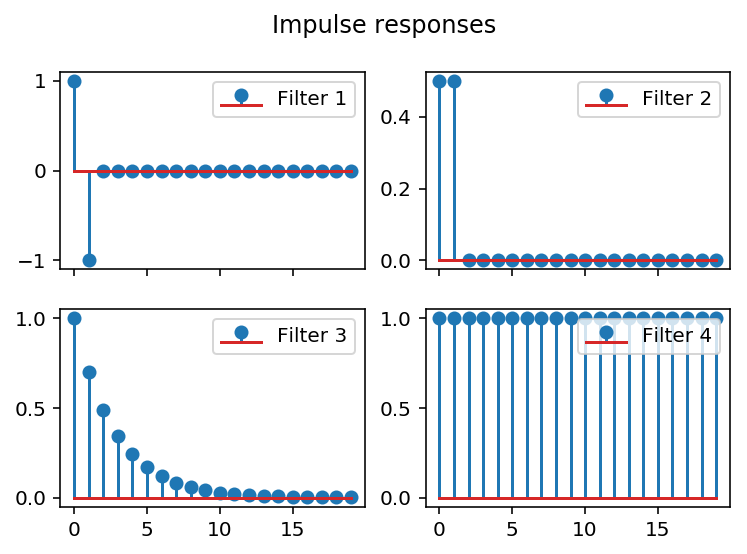

In [17]:
d=dirac_vector(20)
fig,ax=plt.subplots(2,2,sharex=True)

ax[0][0].stem(op1(d),  label="Filter 1")
ax[0][0].legend()
ax[0][1].stem(op2(d),  label="Filter 2")
ax[0][1].legend()
ax[1][0].stem(op3(d), label="Filter 3")
ax[1][0].legend()
ax[1][1].stem(op4(d), label="Filter 4")
ax[1][1].legend()
plt.suptitle("Impulse responses")

#### Curiosity (continued)

The impulse response of op4(op1) is given by

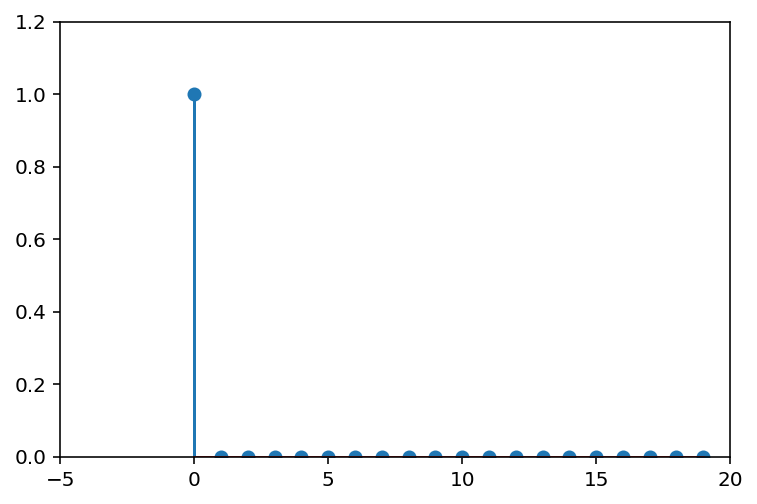

In [11]:
h=op4(op1(dirac_vector(20)))
plt.stem(h, label="Filter 4(1)")
_=plt.axis([-5, 20, 0, 1.2])

This is nothing but a Dirac impulse! We already observed that op4(op1(signal))=signal; that is the filter is an identity transformation. In other words, op4 acts as the "inverse" of op1.     Finally, we note that the impulse response of the indentity filter is a Dirac impulse. 


----
<div align=right> [Index](toc.ipynb) - [Back](DelaysAndScales.ipynb) - [Next](Intro_Fourier.ipynb)</div>